## Execution Control - 3 

Approximation Problems, Break/Continue, Pass 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from numpy import random 

### Estimation Problems

* Estimation problems are useful for building intuition about the idea of measuring properties of human subjects.
* In an estimation problem, we are trying to approximate a quantity. 

### GEOMETRIC SERIES 

$$ geom = \sum_{n=1}^{\infty}{\frac{1}{2^n}} = \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \frac{1}{16} + .....$$

is a geometric series, that sums to 1 as **n** approaches infinity ($\infty$).

In [2]:
N = 10
geomsumarray = np.zeros(N) #I want to save ever value in the loop. 
geomsum = 0
for n in range(1,N+1): #notice the sum starts at 1 not at 0
    geomsum = geomsum + 1/2**n
    geomsumarray[n-1] = geomsum #note I had to index with n-1 because I made the loop sum at 0.  
error = 1-geomsum  #I know the series sums to 1.   
print(geomsum)
print('error is ', error)
print('geomsumarray is ', geomsumarray)
errorarray = 1-geomsumarray
print('errorarray is ', errorarray)

0.9990234375
error is  0.0009765625
geomsumarray is  [0.5        0.75       0.875      0.9375     0.96875    0.984375
 0.9921875  0.99609375 0.99804688 0.99902344]
errorarray is  [0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312 0.00097656]


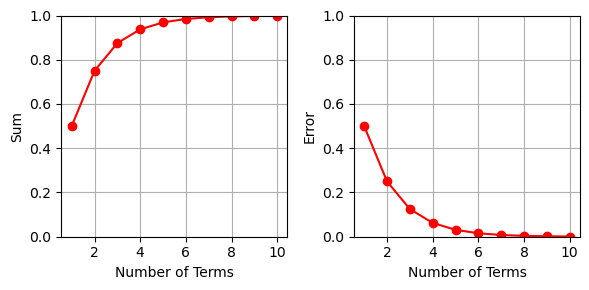

In [3]:
fig,ax = plt.subplots(1,2,figsize = (6,3))
numberofterms = np.arange(1,N+1) #I made a variable for my x axis
ax[0].plot(numberofterms,geomsumarray,'ro-')
ax[0].set_xlabel('Number of Terms')
ax[0].set_ylabel('Sum')
ax[0].set_ylim([0,1])
ax[0].grid()
ax[1].plot(numberofterms,errorarray,'ro-')
ax[1].set_xlabel('Number of Terms')
ax[1].set_ylabel('Error')
ax[1].set_ylim([0,1])
ax[1].grid()
plt.tight_layout()
plt.show()

- I redid this with a slightly different indexing scheme 

In [4]:
N = 10
geomsumarray = np.zeros(N) #I want to save ever value in the loop. 
geomsum = 0
for n in range(N): 
    geomsum = geomsum + 1/2**(n+1) #notice the sum starts with the exponent at 1 not at 0
    geomsumarray[n] = geomsum   
error = 1-geomsum  #I know the series sums to 1.   
print(geomsum)
print('error is ', error)
print('geomsumarray is ', geomsumarray)
errorarray = 1-geomsumarray
print('errorarray is ', errorarray)

0.9990234375
error is  0.0009765625
geomsumarray is  [0.5        0.75       0.875      0.9375     0.96875    0.984375
 0.9921875  0.99609375 0.99804688 0.99902344]
errorarray is  [0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312 0.00097656]


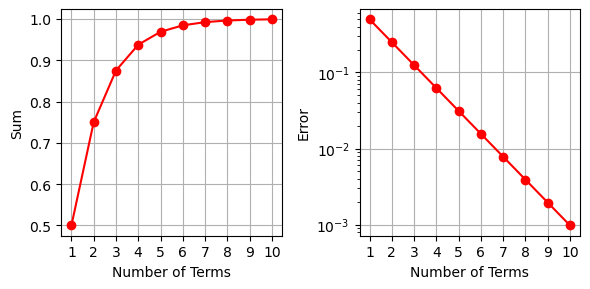

In [5]:
fig,ax = plt.subplots(1,2,figsize = (6,3))
numberofterms = np.arange(1,N+1) #I made a variable for my x axis
ax[0].plot(numberofterms,geomsumarray,'ro-')
ax[0].set_xlabel('Number of Terms')
ax[0].set_ylabel('Sum')
ax[0].set_xticks(numberofterms)
ax[0].grid()
ax[1].plot(numberofterms,errorarray,'ro-')
ax[1].set_xlabel('Number of Terms')
ax[1].set_ylabel('Error')
ax[1].set_yscale('log')
ax[1].set_xticks(numberofterms)
ax[1].grid()
plt.tight_layout()
plt.show()



- In deciding how many terms we need we usually would have some threshold for our approximation to be *good enough* 
- In many scientific libraries, this is an argument the function will take, called a tolerance.   

In [6]:
tol = 0.01 
#Lets compare our errorarray to the value of tol
print(errorarray < tol)
#Lets figure out how many terms that corresponds to 
enoughterms = numberofterms[errorarray < tol] #I find where the errorarray < tol, then use that as an index into number of terms. 
print(enoughterms)
#I want to know the least number of terms that would work.  
minterms = enoughterms[0]
print('Number of terms: ', minterms)

[False False False False False False  True  True  True  True]
[ 7  8  9 10]
Number of terms:  7


- Or I could have done the whole thing as a `while` loop 

In [7]:
tol = 0.01 
n = 0
geomsum = 0 # the sum starts at 0 
error = 1 # the error starts at 1
geomsum_list = list() # I want to keep track of the sums
while error > tol: #I want to keep adding terms as long as error is bigger than tolerance. 
    n = n+1 #increment n 
    geomsum = geomsum + 1/2**(n) #notice the sum starts with the exponent at 1 not at 0
    geomsum_list.append(geomsum) #append the current sum to the list   
    error = 1-geomsum  #I know the series sums to 1
geomsumarray = np.array(geomsum_list)
errorarray = 1-geomsumarray #compute the error at each term
print(geomsumarray)
print(errorarray)
print('Number of terms: ', n)


[0.5       0.75      0.875     0.9375    0.96875   0.984375  0.9921875]
[0.5       0.25      0.125     0.0625    0.03125   0.015625  0.0078125]
Number of terms:  7


### ### Real-world Approximation Problems 

- When we approximate something on a computer its usually because we ***don't know the correct answer*** 
- We are doing some process, e.g., collecting and averaging data,and we want to know if we can stop.  
- So, we want to learn how to stop without knowing the correct answer.   

In [8]:
tol = 0.01
n = 0
geomsum = 0 # the sum starts at 0 
sample = 1 # I make this larger than tol to start
geomsum_list = list() # I want to keep track of the sums
while sample > tol: #I want to keep adding terms as long as sample > tol 
                    # sample will be a term in the sequence. 
                    # notice I am NOT TESTING geomsum 
    n = n+1         #Lets increment the index 
    sample = 1/2**n #generate a new term 
                    #notice the sum starts with the exponent at 1 not at 0
    geomsum = geomsum + sample #add to the sum 
    geomsum_list.append(geomsum) #append the current sum to the list   
geomsumarray = np.array(geomsum_list)
errorarray = 1-geomsumarray #compute the error at each term
print(geomsumarray)
print(errorarray)
print('Number of terms: ', n)

[0.5       0.75      0.875     0.9375    0.96875   0.984375  0.9921875]
[0.5       0.25      0.125     0.0625    0.03125   0.015625  0.0078125]
Number of terms:  7


- Notice that in this implementation, I never made use of the correct value of the infinite sum (1) 
- I am not comparing **geomsum** to the correct answer in order to decide when to stop. 
- Instead, I asked the question, how much will my sum change if I add another term. 
- the value of **sample** is how much the value will change.    

### Break and Continue Statements 

- I really dont like this. 
- `break` exits the loop if a condition is met 
- `continue` skips the current iteration of the loop and proceeds to the next one.   


### Break Statement Syntax 

    for val in range_of_val:
        some code 1
        if condition:
            break
        some code 2

- My examples will use `for` loops.  I cant think of any reason you would build this into a `while` loop but you can.  
- note that some code 1 runs for every iteration of the loop until the loop exits at the break. 
- note that some code 2 will not execute for the iteration where the loop breaks. 

In [9]:
for i in range(5):
    if i == 3:
        break
    print(i)

0
1
2


In [10]:
letters = ['a','b','c','d','e']
for i in letters:
    if i == 'c':
        break
    print(i)

a
b


- We could do our geometric series problem with a `for` loop and a `break` 
- This code below adds the value **term** to the sum
- When term is smaller than **tol** it forces the `for` loop to exit.  


In [12]:
tol = 0.01 # This is a tolerance I want to use for a break statement.  
N = 100
geomsumarray = np.zeros(N) #I want to save ever value in the loop. 
geomsum = 0
for n in range(1,N+1): #notice the sum starts at 1 not at 0
    term = 1/2**n
    geomsum = geomsum + 1/2**n
    geomsumarray[n-1] = geomsum #note I had to index with n-1 because I made the loop sum at 0. 
    error = 1-geomsum 
    if term <= tol:  #Here i do the opposite check of the while loop
        break
error = 1-geomsum  #I know the series sums to 1.   
print(geomsum)
print('error is ', error)
print('geomsumarry is ', geomsumarray)
errorarray = 1-geomsumarray
print('errorarray is ', errorarray)

0.9921875
error is  0.0078125
geomsumarry is  [0.5       0.75      0.875     0.9375    0.96875   0.984375  0.9921875
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.       ]
errorarray is  [0.5       0.2

### Continue Statement Syntax 

    for val in range_of_val:
        some code 1
        if condition:
            continue
        some code 2

- Possibly you would build this into a `while` loop.  

- note that some code 1 runs for every iteration of the loop until the loop exits at the break. 
- note that some code 2 will not execute for each iteration where the `continue` executes. 
- the idea is to skip over some value 

In [13]:
for i in range(5):
    if i == 3:
        continue
    print(i)

0
1
2
4


In [14]:
letters = ['a','b','c','d','e']
for i in letters:
    if i == 'c':
        continue
    print(i)

a
b
d
e
